In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Simulate a match with 'n' games, tracking wins, losses, and draws
def play_match(n):
    
    wins = 0
    losses = 0
    draws = 0
    
    for _ in range(n):
        r = stats.uniform.rvs(loc=0, scale=1)
        if r < 0.3:
            wins += 1  # Win probability 0.3
        elif r < 0.8:
            losses += 1  # Loss probability 0.5
        else:
            draws += 1  # Draw probability 0.2
            
    return wins, losses, draws

In [3]:
# Simulate 1000 matches, each consisting of 100 games

matches = 1000
games_per_match = 100
wins_list = []
losses_list = []
draws_list = []

for _ in range(matches):
    wins, losses, draws = play_match(games_per_match)
    wins_list.append(wins)
    losses_list.append(losses)
    draws_list.append(draws)

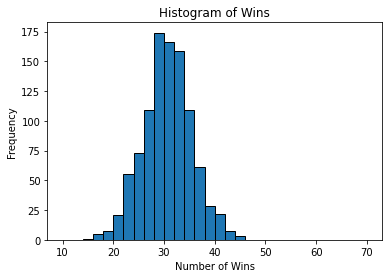

Theoretical mean: 30.0
Theoretical std dev: 4.58257569495584
Sample mean: 30.146
Sample std dev: 4.7666218645913165


In [4]:
# Theoretical mean and standard deviation for wins
n = games_per_match
p_win = 0.3
expectation_wins = n * p_win
std_wins = np.sqrt(n * p_win * (1 - p_win))

# Histogram of wins per match
plt.hist(wins_list, bins=np.arange(10, 72, 2), edgecolor='black')
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.title('Histogram of Wins')
plt.show()

# Compute sample statistics for wins
mean_wins = np.mean(wins_list)
std_dev_wins = np.std(wins_list)

print(f"Theoretical mean: {expectation_wins}")
print(f"Theoretical std dev: {std_wins}")
print(f"Sample mean: {mean_wins}")
print(f"Sample std dev: {std_dev_wins}")

The sample mean is very close to the theoretical mean, so our generated data is properly centered around the expected value. However, there is a slight difference in the sample standard deviation compared to the theoretical standard deviation. This discrepancy is likely due to sample variation, especially since random sampling can result in some deviation from theoretical values, especially so with finite sample sizes.

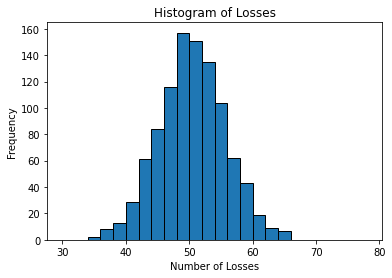

Theoretical mean: 50.0
Theoretical std dev: 5.0
Sample mean: 49.927
Sample std dev: 5.201891098437183


In [5]:
# Theoretical stats for losses
p_loss = 0.5
expectation_losses = n * p_loss
std_losses = np.sqrt(n * p_loss * (1 - p_loss))

plt.hist(losses_list, bins=np.arange(30, 80, 2), edgecolor='black')
plt.xlabel('Number of Losses')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

# Sample statistics for losses
mean_losses = np.mean(losses_list)
std_dev_losses = np.std(losses_list)

print(f"Theoretical mean: {expectation_losses}")
print(f"Theoretical std dev: {std_losses}")
print(f"Sample mean: {mean_losses}")
print(f"Sample std dev: {std_dev_losses}")

The sample mean is very close to the theoretical mean, so our generated data is properly centered around the expected value. Once again, there is a slight difference in the sample standard deviation compared to the theoretical standard deviation. For the same reason before, this discrepancy is likely due to sample variation.

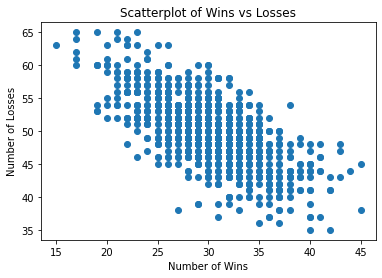

In [6]:
plt.scatter(wins_list, losses_list)
plt.xlabel('Number of Wins')
plt.ylabel('Number of Losses')
plt.title('Scatterplot of Wins vs Losses')
plt.show()

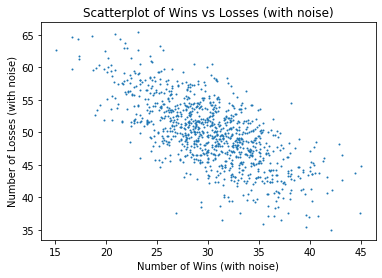

In [7]:
# Add some random noise to scatter points for better visualization

r_wins = np.array(wins_list) + stats.uniform.rvs(loc=-0.5, scale=1, size=matches)
r_losses = np.array(losses_list) + stats.uniform.rvs(loc=-0.5, scale=1, size=matches)

plt.scatter(r_wins, r_losses, s=1)
plt.xlabel('Number of Wins (with noise)')
plt.ylabel('Number of Losses (with noise)')
plt.title('Scatterplot of Wins vs Losses (with noise)')
plt.show()

In [8]:
# covariance and correlation between wins and losses
cov_wins_losses = np.cov(wins_list, losses_list)[0, 1]
corr_wins_losses = np.corrcoef(wins_list, losses_list)[0, 1]

print(f"Covariance: {cov_wins_losses:.2f}, Correlation coefficient: {corr_wins_losses:.2f}")

Covariance: -16.82, Correlation coefficient: -0.68


In [9]:
# function to generate sum of 'n' uniform random variables
def get_z(n):
    return np.sum(stats.uniform.rvs(loc=-0.5, scale=1, size=n))

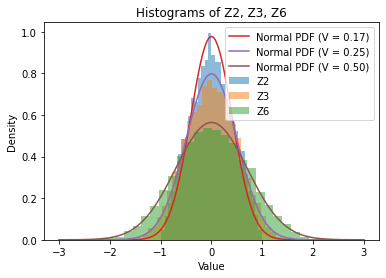

In [10]:
# Generate distributions for Z2, Z3, Z6
Z2 = [get_z(2) for _ in range(10000)]
Z3 = [get_z(3) for _ in range(10000)]
Z6 = [get_z(6) for _ in range(10000)]

# Plot histograms of Z2, Z3, and Z6
plt.hist(Z2, bins=30, density=True, alpha=0.5, label='Z2')
plt.hist(Z3, bins=30, density=True, alpha=0.5, label='Z3')
plt.hist(Z6, bins=30, density=True, alpha=0.5, label='Z6')

# Normal distributions for comparison
x = np.linspace(-3, 3, 1000)
for var in [2/12, 3/12, 6/12]:
    plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(var)), label=f'Normal PDF (V = {var:.2f})')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histograms of Z2, Z3, Z6')
plt.show()

For a continuous uniform random variable  $Z$  defined over an interval $[a, b]$, the variance  $\text{Var}(Z)$  is given by:

$\text{Var}(Z) = \frac{(b - a)^2}{12}$

Using this formula we can see that the given variances are the correct variances for the random variables.

The distribution $Z_6$ most closely matches the overlaid pdf.

In [11]:
# Function to generate correlated values X and Y
def get_xy():
    C = get_z(2)
    X = C + get_z(4)
    Y = C + get_z(6)
    return X, Y

$\text{Cov}(X, Y) = \text{Cov}(C + Z_4, C + Z_6)$

Since  $Z_4$  and  $Z_6$  are independent of  $C$  and each other, the covariance becomes:

$\text{Cov}(X, Y) = \text{Var}(C) = \text{Var}(Z_2)$

The variance of  $Z_2$  is:

$\text{Var}(Z_2) = \frac{2}{12}$

Correlation Coefficient:

The correlation coefficient  $\rho_{XY}$  is given by:

$\rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$

The variances of  X  and  Y  are:

$\text{Var}(X) = \text{Var}(C) + \text{Var}(Z_4) = \frac{2}{12} + \frac{4}{12} = \frac{6}{12}$


$\text{Var}(Y) = \text{Var}(C) + \text{Var}(Z_6) = \frac{2}{12} + \frac{6}{12} = \frac{8}{12}$

Therefore, the correlation coefficient is:

$\rho_{XY} = \frac{\frac{2}{12}}{\sqrt{\frac{6}{12}} \cdot \sqrt{\frac{8}{12}}} = \frac{\frac{2}{12}}{\frac{\sqrt{48}}{12}} = \frac{2}{\sqrt{48}} = \frac{1}{\sqrt{12}}$

Thus, the covariance is  $\frac{2}{12}$  and the correlation coefficient is  $\frac{1}{\sqrt{12}}$ .

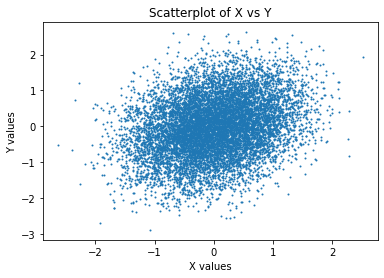

Sample mean of X: -0.00, Sample mean of Y: -0.02
Sample standard deviation of X: 0.70, Sample standard deviation of Y: 0.81
Sample covariance: 0.1610
Sample correlation coefficient: 0.2833
Theoretical covariance: 0.1667
Theoretical correlation coefficient: 0.2887


In [12]:
# Generate 10,000 (X, Y) pairs
xy_pairs = [get_xy() for _ in range(10000)]
X_vals, Y_vals = zip(*xy_pairs)

plt.scatter(X_vals, Y_vals, s=1)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatterplot of X vs Y')
plt.show()

# Compute sample statistics for X and Y
mean_X = np.mean(X_vals)
mean_Y = np.mean(Y_vals)
std_X = np.std(X_vals)
std_Y = np.std(Y_vals)

# Compute covariance and correlation of X and Y
cov_XY = np.cov(X_vals, Y_vals)[0, 1]
corr_XY = np.corrcoef(X_vals, Y_vals)[0, 1]

print(f"Sample mean of X: {mean_X:.2f}, Sample mean of Y: {mean_Y:.2f}")
print(f"Sample standard deviation of X: {std_X:.2f}, Sample standard deviation of Y: {std_Y:.2f}")
print(f"Sample covariance: {cov_XY:.4f}")
print(f"Sample correlation coefficient: {corr_XY:.4f}")

# Theoretical covariance and correlation
theoretical_cov = 2/12
theoretical_corr = 1/np.sqrt(12)

print(f"Theoretical covariance: {theoretical_cov:.4f}")
print(f"Theoretical correlation coefficient: {theoretical_corr:.4f}")